In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [9]:
df = pd.read_csv("C:\\ElectricVehicle_project\\data\\cars_data_cleaned.csv")
df.head()


,row_id,title,model,battery,price_range,zero_to_hundred,top_speed,fastcharge,germany_price_before_incentives,netherlands_price_before_incentives,uk_price_after_incentives,drive_configuration,tow_hitch,towing_capacity_in_kg,number_of_seats
0,1,Tesla,Model 3,57.5,104,6.1,201,690 km/h,"€41,970","€41,990","£39,990",Rear Wheel Drive,Towbar possible,1000.0,5
1,2,Tesla,Model Y,57.5,137,6.9,217,580 km/h,"€45,970","€45,990","£44,990",Rear Wheel Drive,Towbar possible,1600.0,5
2,3,Tesla,Model Y Long Range Dual Motor,75.0,130,5.0,217,670 km/h,"€55,970","€52,990","£52,990",All Wheel Drive,Towbar possible,1600.0,5
3,4,Tesla,Model 3 Long Range Dual Motor,75.0,106,4.4,201,770 km/h,"€50,970","€49,990","£49,990",All Wheel Drive,Towbar possible,1000.0,5
4,5,Tesla,Model Y Long Range RWD,75.0,109,5.9,217,710 km/h,"€49,970","€49,990","£31,995",Rear Wheel Drive,Towbar possible,1600.0,5


In [10]:
df.isna().sum()
df = df.dropna(subset=["battery", "zero_to_hundred", "top_speed"])
df.reset_index(drop=True, inplace=True)
df.shape


(353, 15)

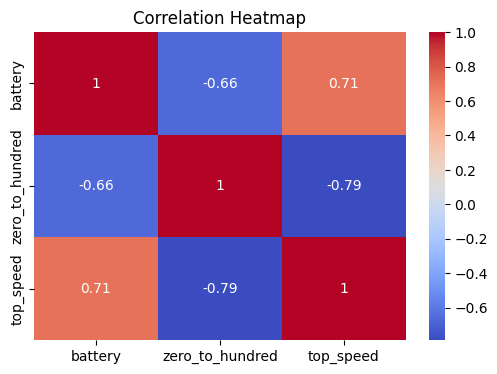

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["battery","zero_to_hundred","top_speed"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
df["battery_speed_ratio"] = df["battery"] / df["zero_to_hundred"]
df.head()


,row_id,title,model,battery,price_range,zero_to_hundred,top_speed,fastcharge,germany_price_before_incentives,netherlands_price_before_incentives,uk_price_after_incentives,drive_configuration,tow_hitch,towing_capacity_in_kg,number_of_seats,battery_speed_ratio
0,1,Tesla,Model 3,57.5,104,6.1,201,690 km/h,"€41,970","€41,990","£39,990",Rear Wheel Drive,Towbar possible,1000.0,5,9.426230
1,2,Tesla,Model Y,57.5,137,6.9,217,580 km/h,"€45,970","€45,990","£44,990",Rear Wheel Drive,Towbar possible,1600.0,5,8.333333
2,3,Tesla,Model Y Long Range Dual Motor,75.0,130,5.0,217,670 km/h,"€55,970","€52,990","£52,990",All Wheel Drive,Towbar possible,1600.0,5,15.000000
3,4,Tesla,Model 3 Long Range Dual Motor,75.0,106,4.4,201,770 km/h,"€50,970","€49,990","£49,990",All Wheel Drive,Towbar possible,1000.0,5,17.045455
4,5,Tesla,Model Y Long Range RWD,75.0,109,5.9,217,710 km/h,"€49,970","€49,990","£31,995",Rear Wheel Drive,Towbar possible,1600.0,5,12.711864


In [15]:
X = df[["battery", "zero_to_hundred", "battery_speed_ratio"]]
y = df["top_speed"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [17]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)


In [18]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [19]:
def evaluate(name, y_true, y_pred):
    print(f"\n✅ {name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate("Linear Regression", y_test, lr_pred)
evaluate("Ridge Regression", y_test, ridge_pred)
evaluate("Random Forest", y_test, rf_pred)



✅ Linear Regression
MAE: 11.389154187852727
RMSE: 14.748400740051265
R2 Score: 0.8268927196640584

✅ Ridge Regression
MAE: 11.387275417104618
RMSE: 14.747631596447864
R2 Score: 0.8269107746230895

✅ Random Forest
MAE: 9.654393024815557
RMSE: 13.638941517441959
R2 Score: 0.8519573643591205


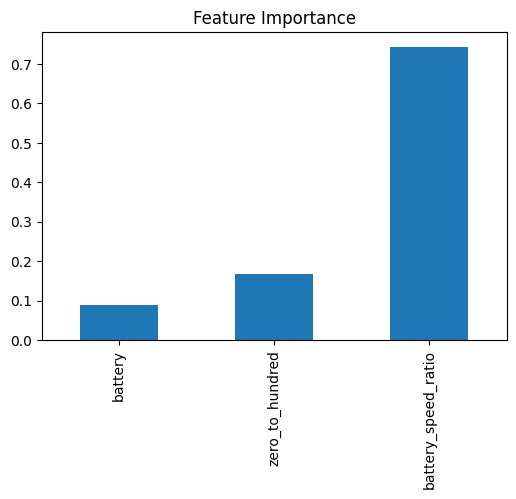

In [20]:
pd.Series(rf.feature_importances_, index=X.columns).plot(kind="bar", figsize=(6,4))
plt.title("Feature Importance")
plt.show()


In [22]:
with open("ev_speed_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("✅ Model saved as ev_speed_model.pkl")


✅ Model saved as ev_speed_model.pkl
